In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64 

Data Type:
 id                          

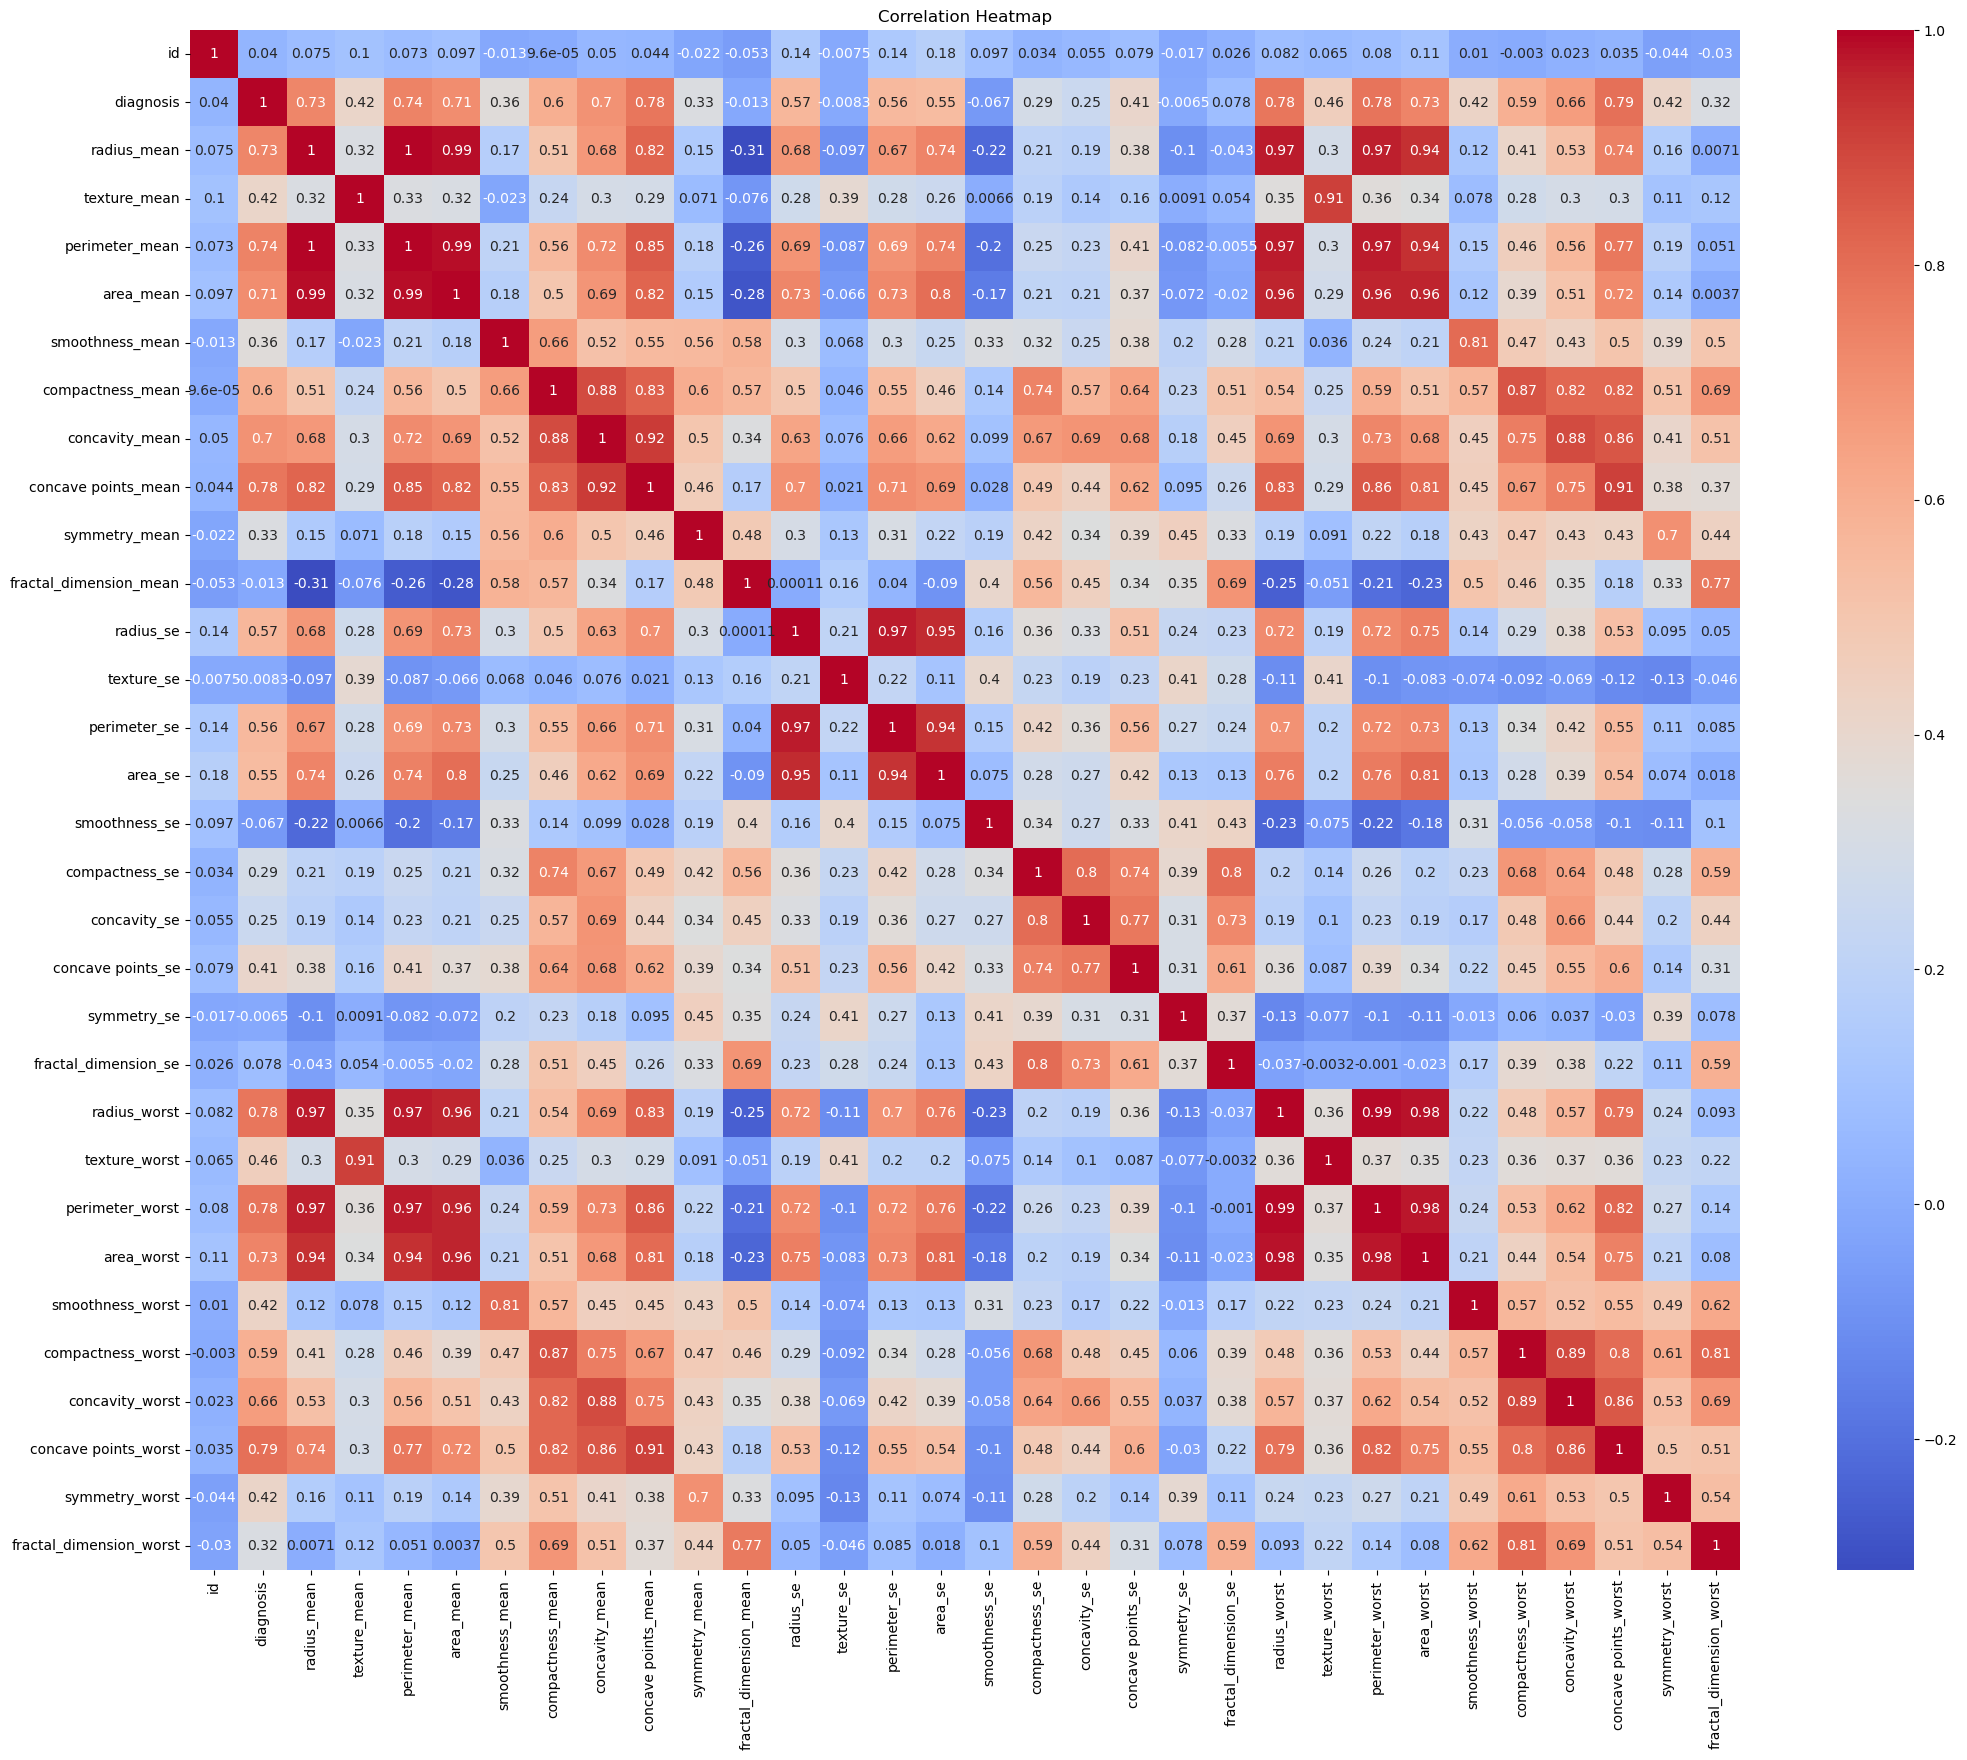

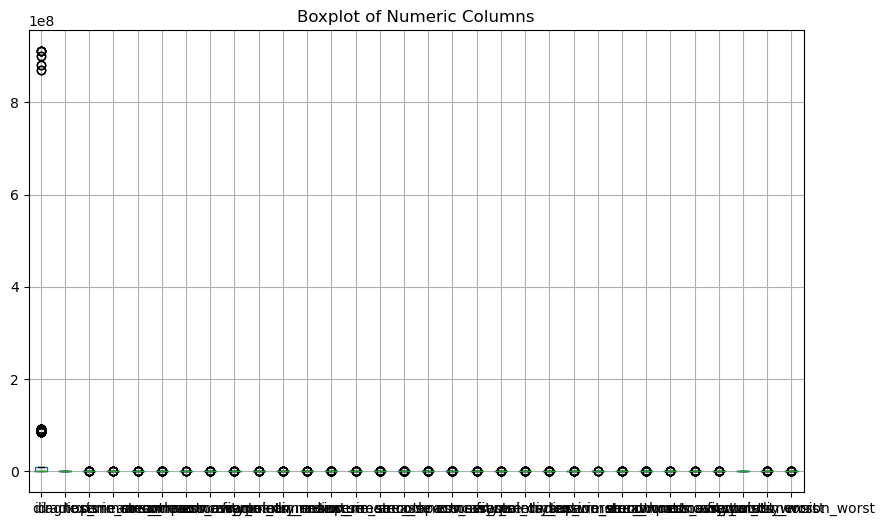

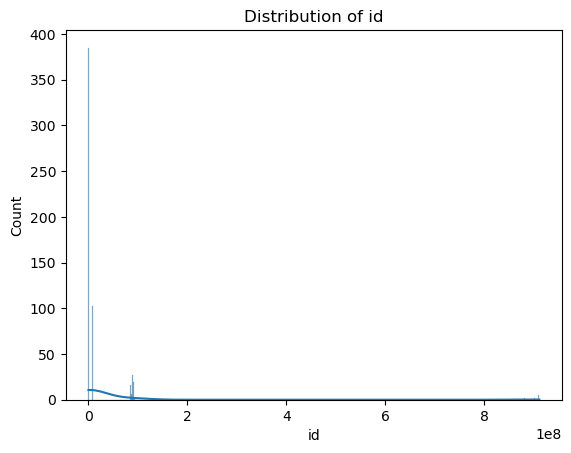

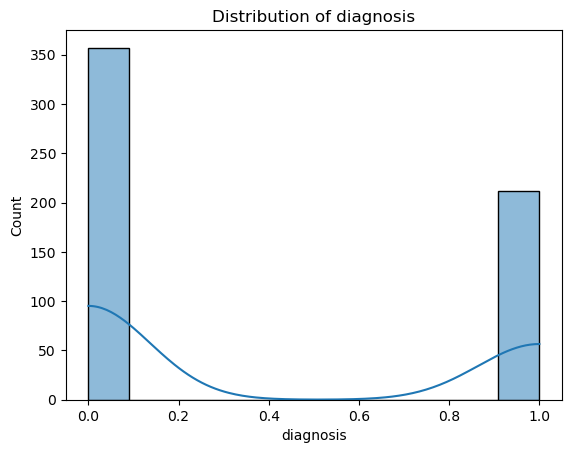

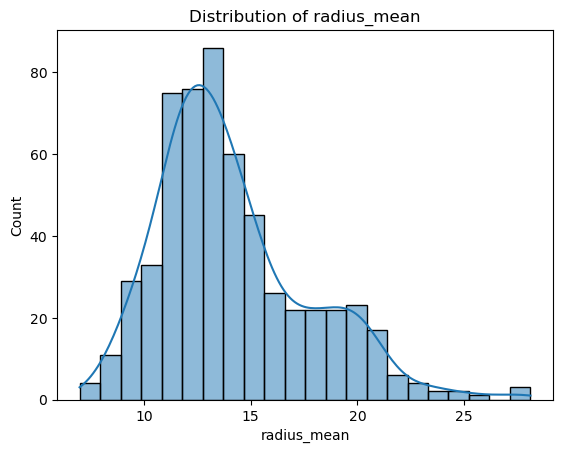

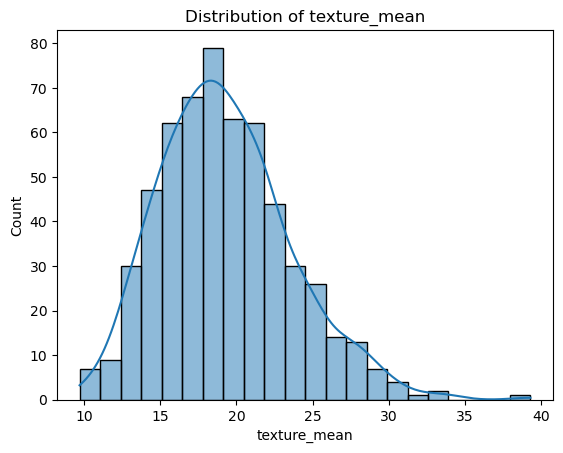

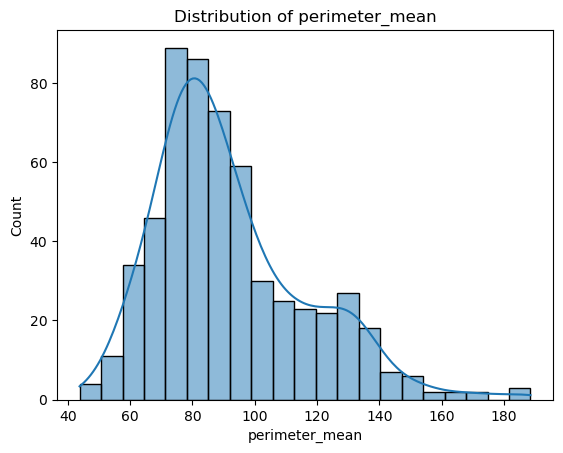

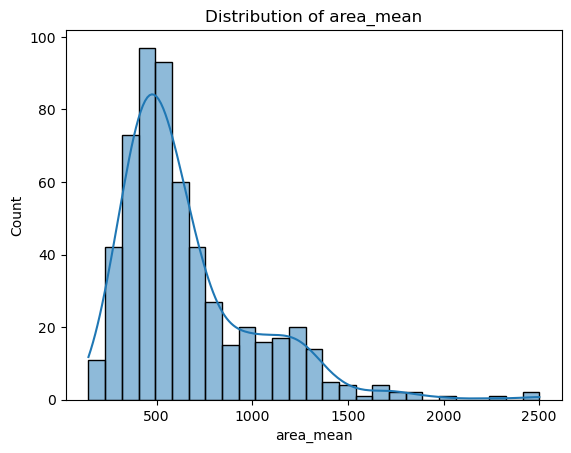

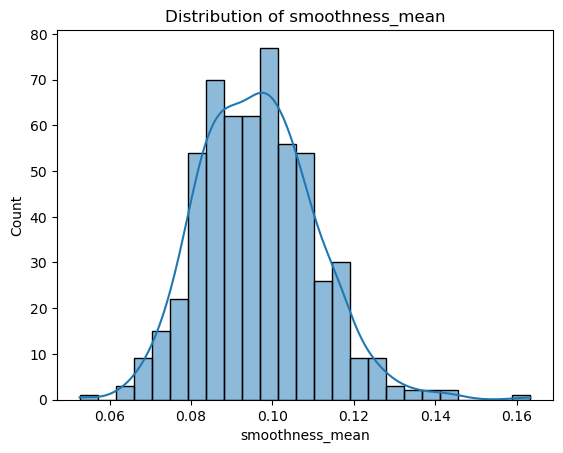

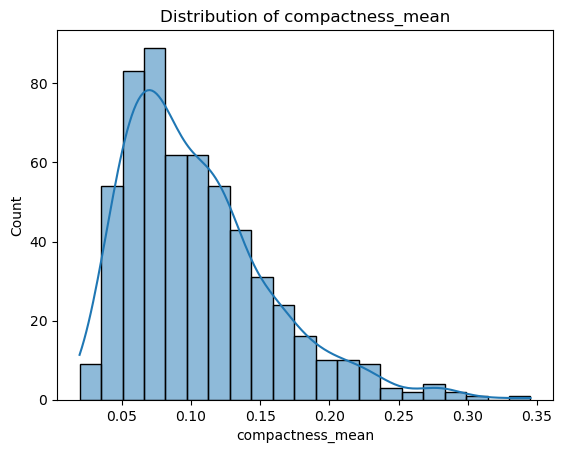

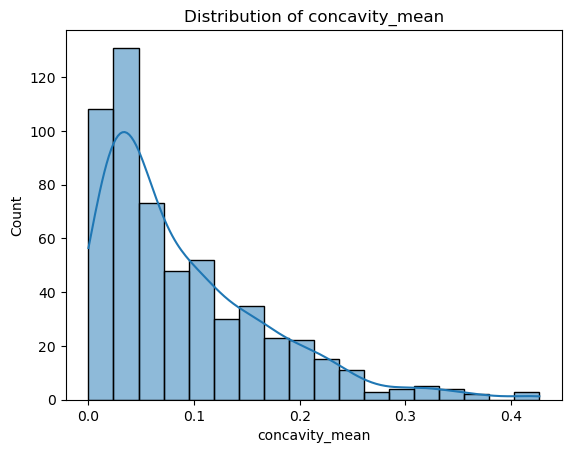

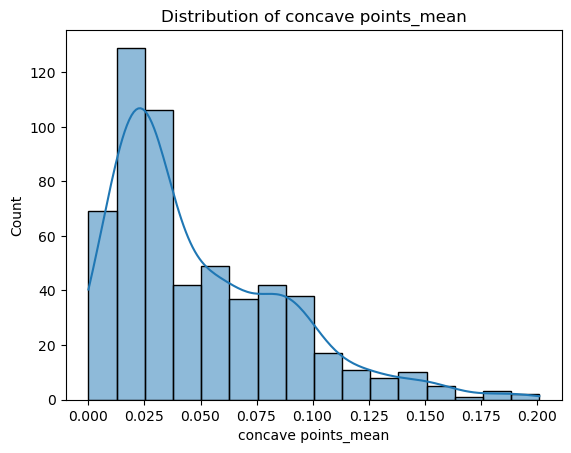

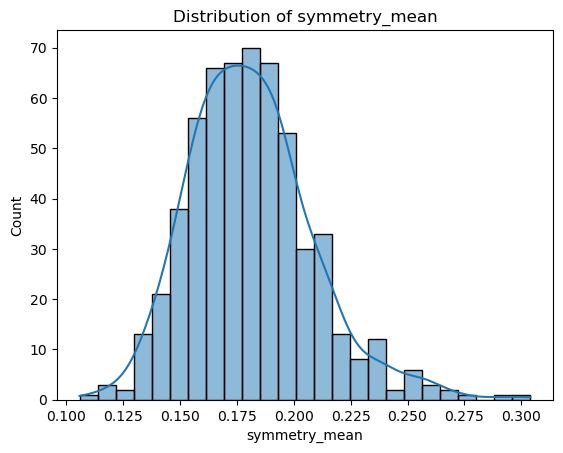

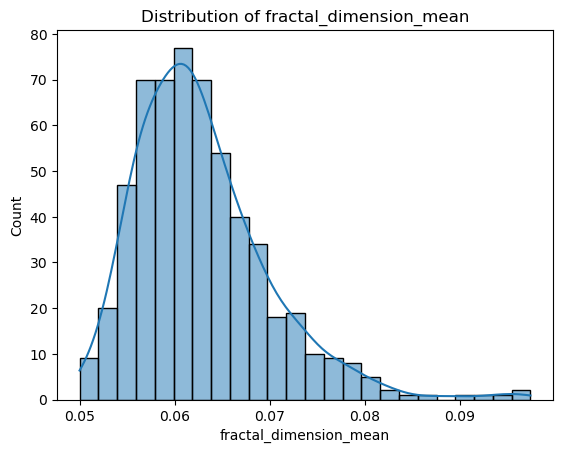

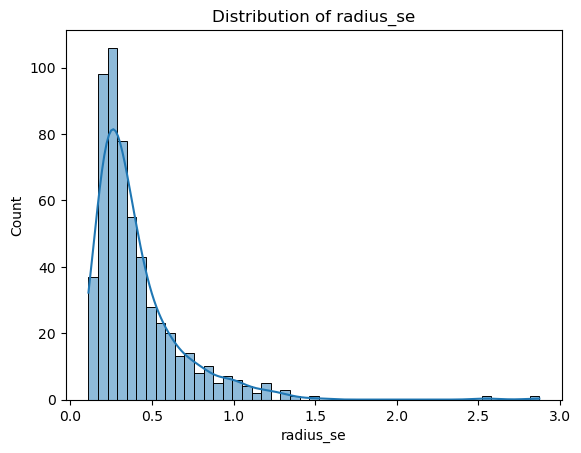

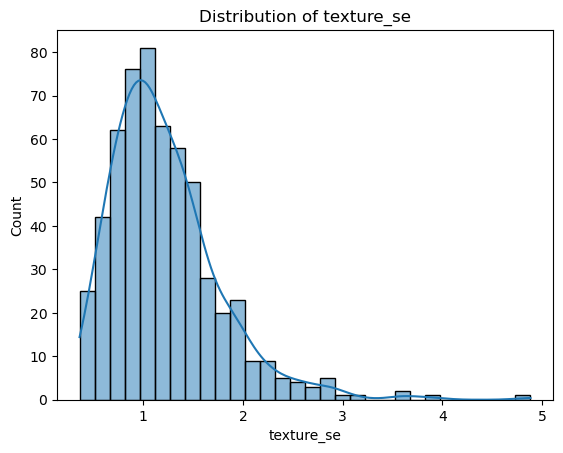

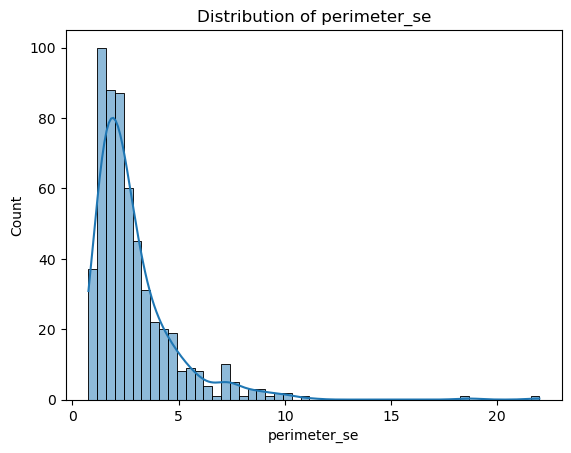

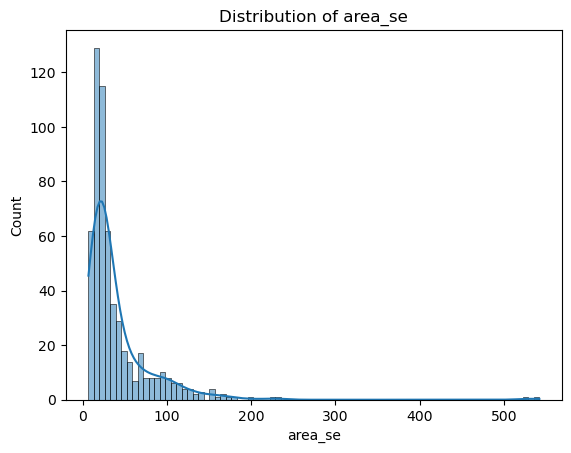

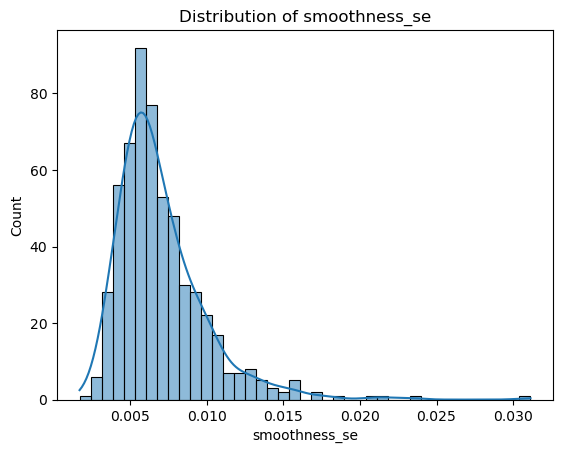

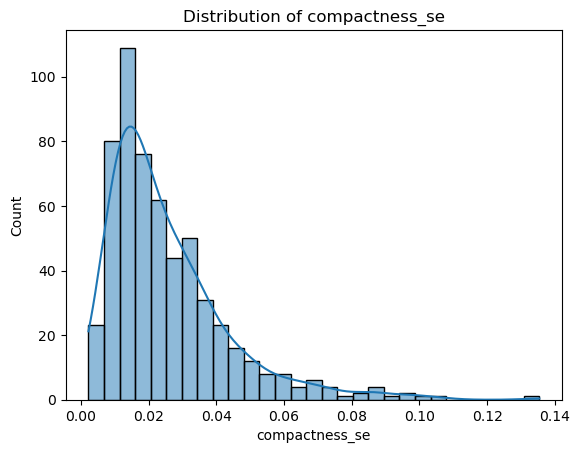

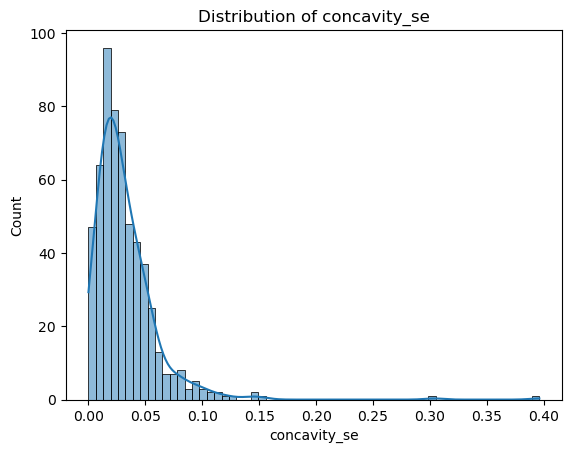

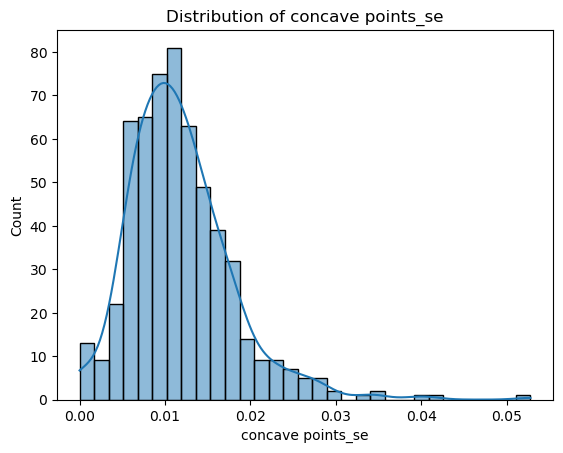

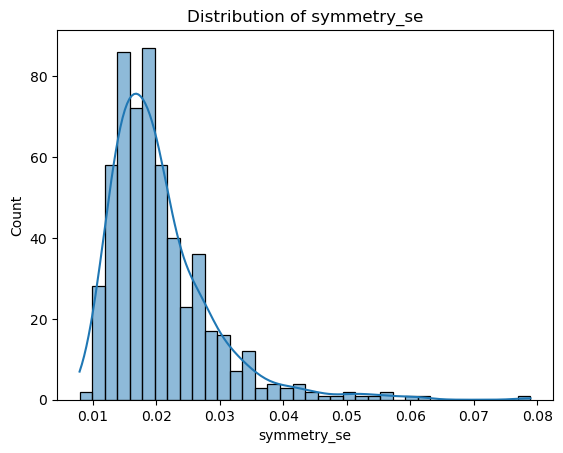

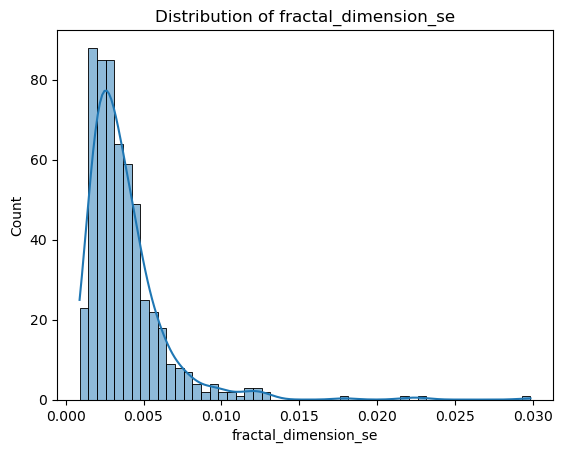

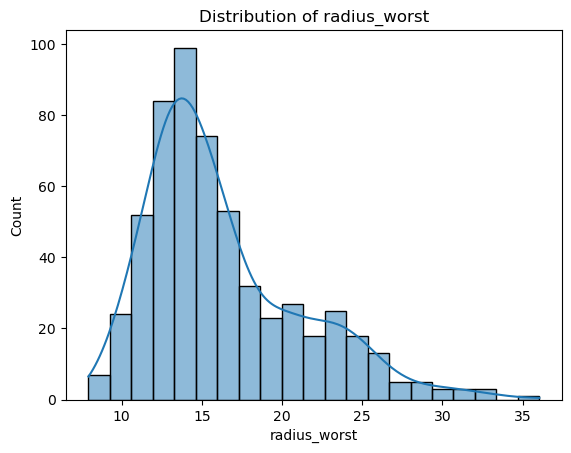

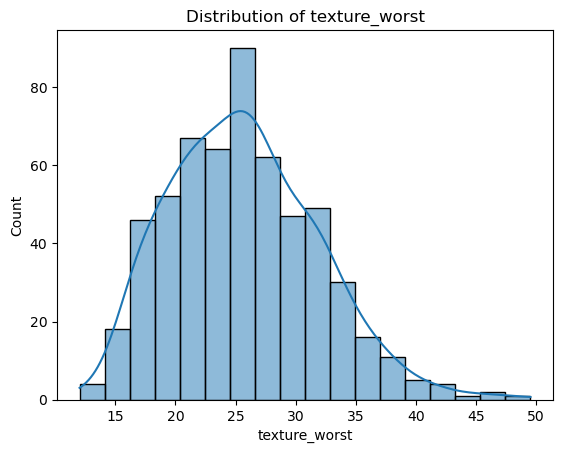

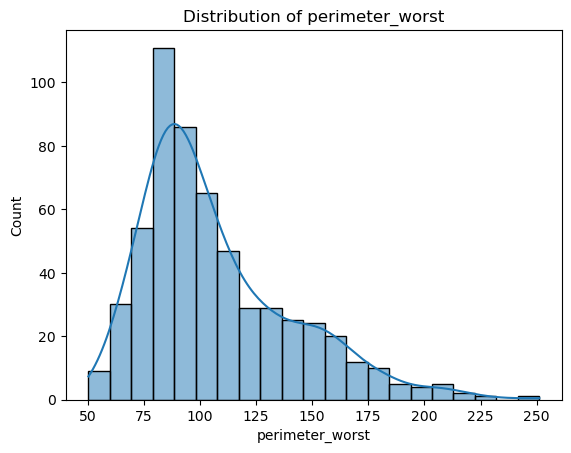

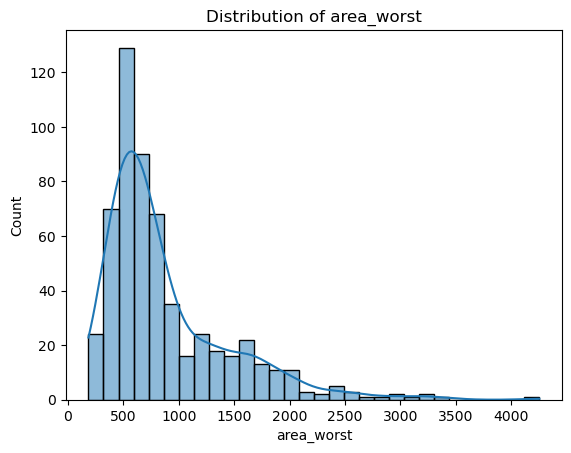

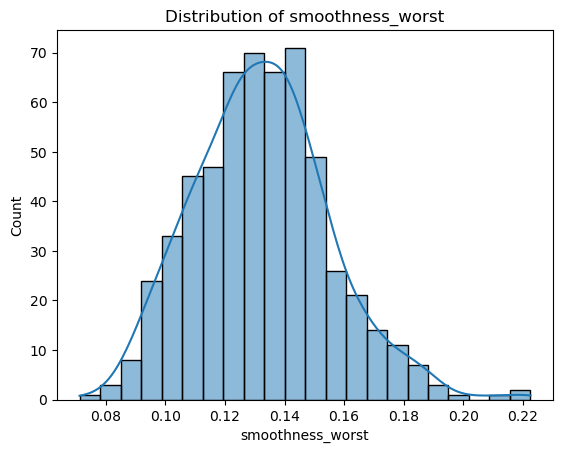

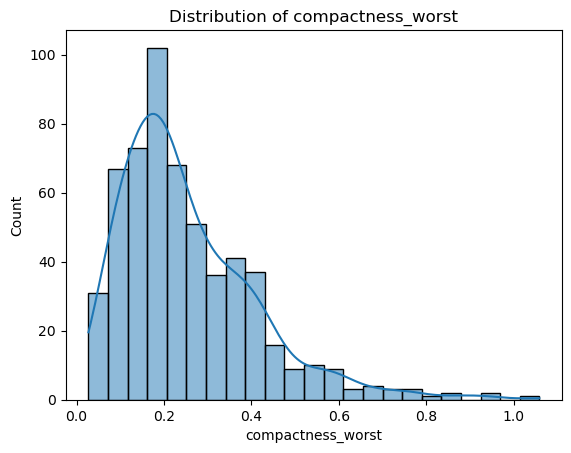

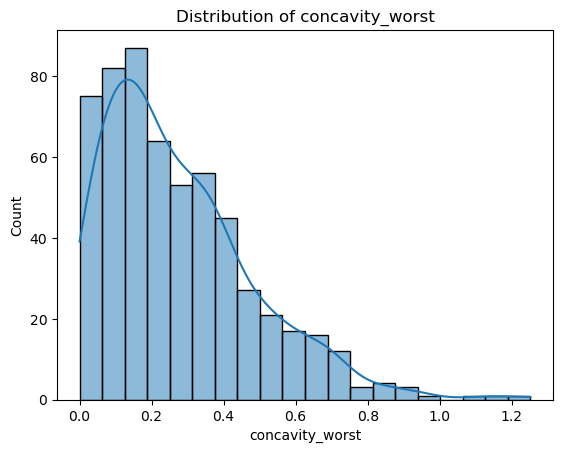

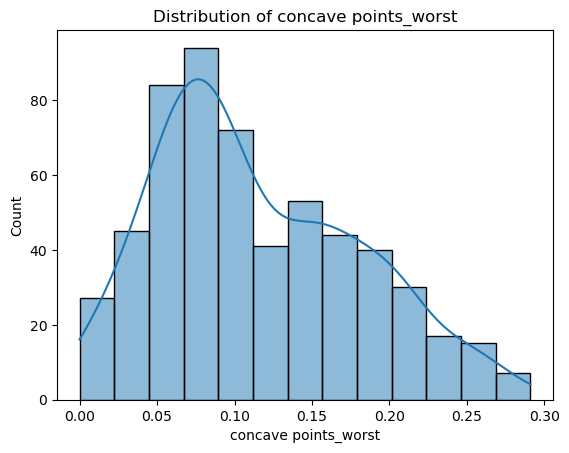

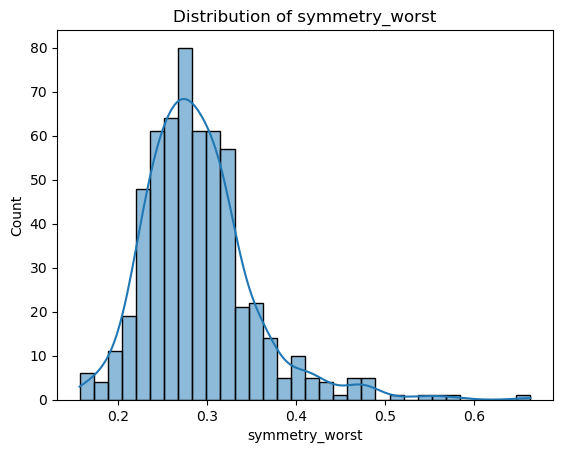

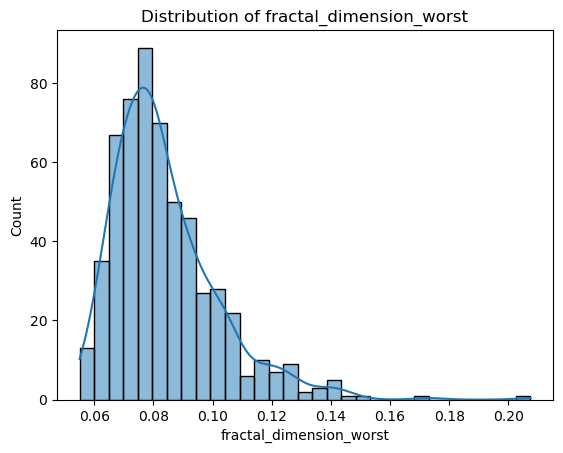

In [2]:
# The first step is to create a function that checks the validity of the data to ensure completeness, timeliness and consistency.
# Our dataset, the Boston Housing dataset, was obtained from the Kaggle website.
# Defining the validate function.
def validate_data(data):
    """
  Performs a comprehensive validation of a pandas data frame to ensure data quality.

  Args:
      data (pandas.DataFrame): The DataFrame to be validated.

  Returns:
      None (This function performs data validation and visualization but does not return a value)

  This function performs the following data validation checks and visualizations:

      1. Missing Values: Identifies and displays the missing values in each column.
      2. Data Types: Shows the data type of each column.
      3. Data Duplicates: Counts and displays the number of duplicate rows in the DataFrame.
      4. Descriptive Statistics: Generates summary statistics for numerical columns (mean, standard deviation, etc.).
      5. Feature Correlations: Calculates and visualizes the correlation matrix to identify potential relationships between features.
      6. Outlier Visualization: Creates boxplots for each numeric column to visualise outliers.
      7. Distribution Visualization: Generates histograms with kernel density estimation (KDE) to visualize the distribution of each numeric column.

  By performing these checks and visualizations, this function provides valuable insights into the data quality and helps identify potential issues before using the data for further analysis or modelling.
  """
    # Check for missing values.
    print("Missing Values:\n", data.isnull().sum(), "\n")
    # Check data types.
    print("Data Type:\n", data.dtypes, "\n")
    # Check for data duplicates
    print("Number of Duplicates:\n", data.duplicated().sum(), "\n")
    # Descriptive Statistics.
    print("Descriptive Statistics:\n", data.describe(), "\n")
    # Check for correlation in the dataset to identify features to be used in training the model.
    print("Feature Correlations:\n", data.corr(), "\n")
    plt.figure(figsize=(25, 20))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    # Visualise outliner for each numeric column
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_columns].boxplot(figsize=(10, 6))
    plt.title("Boxplot of Numeric Columns")
    plt.show()
    # Visualise distribution for each numeric column
    for column in numeric_columns:
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()
data = pd.read_csv(r"C:\Users\okwuk\OneDrive\Desktop\Breast_Cancer\dataClas.csv") # Load the data set.
validate_data(data) # Run the validation.

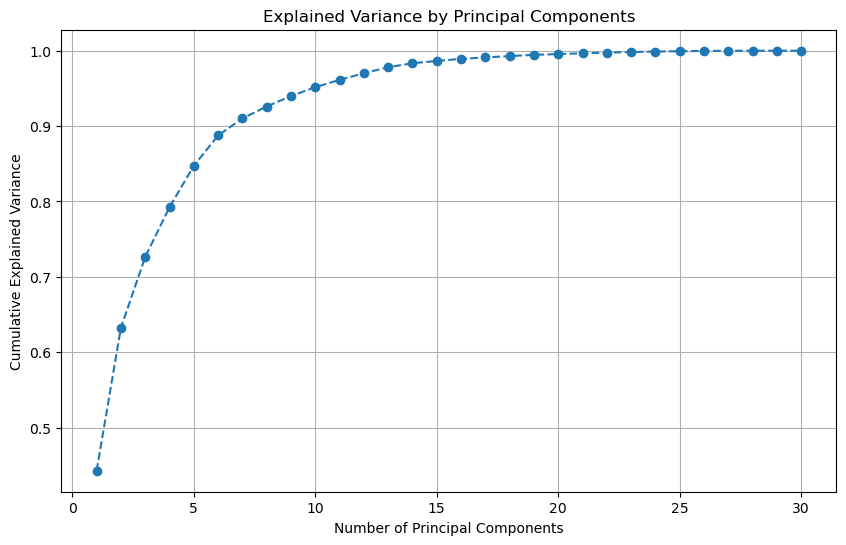

Number of components explaining 95% variance: 10
        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   

        PC8       PC9      PC10  diagnosis  
0 -0.398407 -0.157118 -0.877402          1  
1  0.240988 -0.711905  1.106995          1  
2  0.097374  0.024066  0.454275          1  
3  1.059565 -1.405440 -1.116975          1  
4  0.636376 -0.263805  0.377704          1  


In [3]:
 # No missing value.
# No severe outliners in data.
# y target is the diagnostic column.
# In selecting our features (X), we must carefully examine the feature correlation and the correlation heat map.
# The rationale is that combining strong predictors and managing multicollinearity will lead to building,
# a more accurate and stable logistics regression model for breast cancer.
# Also, Domain knowledge would further assist us in selecting features for our logistics regression model.
# However, we need to apply feature engineering due to multicollinearity and reducing redundancy, 
# which is a great way to capture the combined effect of these variables.
# redundancy might occur due to having mean, re and worst of each feature.
# We would use Principal Component Analysis (PCA) to achieve this.
# Another valuable reason to implement PCA is when domain knowledge is insufficient to help in feature engineering.
# Therefore, using a PCA is viable so as not to lose important variability in the data, which might affect the model's accuracy.


# Drop the y target column and id to focus only on X features
X = data.drop(columns=['diagnosis', 'id'])

# To implement PCA successfully, the data should be standardised.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Choose the number of components that explain at least 95% of the variance
n_components = np.argmax(explained_variance >= 0.95) + 1
#n_components = np.argmax(explained_variance >= 0.99) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Add the target variable back to the reduced dataset
data_pca = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
data_pca['diagnosis'] = data['diagnosis']

# # Save the PCA reduced dataset to a CSV file
data_pca.to_csv('pca_reduced_dataset.csv', index=False)

# Display the first few rows of the PCA reduced dataset
print(data_pca.head())

#print(type(X))
# Convert the entire DataFrame into a NumPy array
#data_a = data_pca.to_numpy()


In [4]:
# Display the PCA components (loadings)
components = pca.components_
#print("PCA Components (Loadings):")
#print(components)

# `X` is the data frame with feature names @ when we dropped the diagnosis and id above
features = X.columns  # Original feature names
#print(features)

# Create a data frame for better readability
components_df = pd.DataFrame(components, columns=features)

# Display the loadings for each principal component.
print("Loading for each principal component from PC1 to PCn+1 \n")
print(components_df)
# Each principal component (PC) is a linear combination of the original features and the numbers in the PCA components (or loadings). 
# The matrix indicates how much each original feature contributes to each PC.
# The matrix helps interpret the relationship between features and the principal components."""

Loading for each principal component from PC1 to PCn+1 

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
2    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
3    -0.041409      0.603050       -0.041983  -0.053434        -0.159383   
4    -0.037786      0.049469       -0.037375  -0.010331         0.365089   
5     0.018741     -0.032179        0.017308  -0.001888        -0.286374   
6    -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
7    -0.007452      0.130675       -0.018687   0.034674        -0.288975   
8    -0.223110      0.112699       -0.223739  -0.195586         0.006425   
9     0.095486      0.240934        0.086386   0.074956        -0.069293   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.239285        0.25

In [5]:
# Moving features into X numpy array and target into y numpy array.
X = data_pca[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]].values
y = data_pca["diagnosis"].values

# Check the shape of X and y before splitting.
print("X shape before splitting into train and test:", X.shape)
print("y Shape before splitting into train and test:", y.shape, "\n")

# Splitting the array into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

# Check the shape of X and y after splitting.
print("Train set size after splitting into train and test:", X_train.shape, y_train.shape)
print("Test set size after splitting into train and test:", X_test.shape, y_test.shape, "\n")

# Distinguish m and n for X_train only.
print("Number of training examples(m):", X_train.shape[0])
print("Number of features(n):", X_train.shape[1], "\n")

# Checking data class
# print(type(data_a))"""

X shape before splitting into train and test: (569, 10)
y Shape before splitting into train and test: (569,) 

Train set size after splitting into train and test: (455, 10) (455,)
Test set size after splitting into train and test: (114, 10) (114,) 

Number of training examples(m): 455
Number of features(n): 10 



In [6]:
def zscore_normalise_features(X_train):
    """ Computes X and uses the zscore technique to normalise the features.

    Args:
        X (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        X_norm (ndarray(m,n))   : Input data norm by column
        mu (ndarray(n,))        : Mean of each feature
        sigma (ndarray(n,))     : Standard deviation of each feature """

     
    #find the mean of each column/feature in the array X.
    mu = np.mean(X_train, axis=0)        # mu will have shape (n,).
    # find the standard deviation of each column/feature.
    sigma = np.std(X_train, axis=0)     # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_train_nr = (X_train - mu) / sigma     # zscore normaliseing technique formula.

    return (X_train_nr, mu, sigma)

In [7]:
X_norm, X_mu, X_sigma = zscore_normalise_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}", "\n")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}", "\n")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(X_norm.shape[1])

X_mu = [-0.02519212 -0.00057554  0.00951837 -0.02677319 -0.06140494  0.0432057
 -0.00296975  0.01157997  0.01638952  0.00127426], 
X_sigma = [3.62719654 2.44783844 1.72894291 1.37854638 1.2823466  1.11785647
 0.83149331 0.70627101 0.65538667 0.60744694] 

Peak to Peak range by column in Raw        X:[21.88496913 20.34904703 14.9927849   9.96746702 12.28009002  9.35199532
  9.50190359  8.31546868  6.40279838  5.93079764] 

Peak to Peak range by column in Normalized X:[ 6.03357687  8.31306785  8.67164831  7.23041832  9.57626436  8.36600722
 11.42751653 11.77376466  9.76949745  9.7634826 ]
10


In [8]:
X_train = X_norm

In [9]:
# Checking data types of both X_train, X_test, y_train and y_test.
print("X_train data type: \n", X_train.dtype)
print("y_train data type: \n", y_train.dtype)
print("X_test data type: \n", X_test.dtype)
print("y_test data type: \n", y_test.dtype)

X_train data type: 
 float64
y_train data type: 
 int64
X_test data type: 
 float64
y_test data type: 
 int64


In [10]:
# Viewing the first 5 rows of our training example.
print(X_train[:5])

[[ 1.20070548  3.7596849   0.85800662 -0.21266902 -3.63923889  1.94350408
  -3.10055447  1.82305802  5.74886436 -4.509748  ]
 [ 2.49017597  0.23760009 -1.81858727  0.64491322  0.01222984  0.61060481
   1.02088644 -0.85394933 -1.57465996  1.97775381]
 [-0.63104938  1.33528634  1.6117975  -0.39095764  0.34564683  2.60773891
   0.25680869 -0.9055435  -0.37949264  0.06605988]
 [-0.70505242  0.29813596 -0.32254458  1.71111571  1.47906186  0.0867379
   0.15025452  0.36994692  0.90521483  0.57486061]
 [-0.65081765  1.12680381  0.69670736 -1.28230429  2.65104846  2.23425641
   0.90127881 -1.30590346  0.37541235  2.16934899]]


In [11]:
# Let define the sigmoid function.
def sigmoid(z):
    """ 
    Compute the sigmoid z:

    Args:
        z (ndarray): A scalar, numpy array of any size

    Returns:
        g (ndarray): sigmoid(z) with the same shape as z
        
    """

    g = 1/(1+np.exp(-z))

    return g

In [12]:
# Initialising parameters
m = X_train.shape[0] # moving the training example into m
n = X_train.shape[1] # moving the features into n
w = np.zeros((n,))   # w is the weight of the features, and therefore, it will be initialised to have a format of ndarray with shape n 
b = 0.0              # b is the bias, which is a single scalar or float figure but should be initialised to 0.0.
alpha = 0.05              
num_iters = 30000
lambda_ = 1

In [13]:
# Compute cost function for logistics regression with lambda.
def compute_cost_logistics_lam(X_train, y_train, w, b, lambda_):
    """ 
    Compute the cost (J)

    Args:
        X_train (ndarray(m,n)): Data, m examples with n features
        y_train (ndarray(m,)) : target values with shape m
        w (ndarray(n,))       : model parameter with shape n
        b (Scalar)            : model parameter
        lambda_ (scalar): Controls amount of regularization
    Returns: 
        cost(scalar): cost
    """
    # initialise cost to zero
    cost = 0.0
    epsilon = 1e-10  # Small value to avoid log(0)
    for i in range(m):
        z_i = np.dot(X_train[i],w) + b
        f_wb_i = sigmoid(z_i)
        # Apply the sigmoid function and clip the output to avoid extremes
        #f_wb_i = np.clip(sigmoid(z_i), epsilon, 1 - epsilon)
        cost += -y_train[i]*np.log(f_wb_i) - (1-y_train[i])*np.log(1-f_wb_i)
    cost = cost / m

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/(2*m)) * reg_cost

    cost = cost + reg_cost
    return cost

In [14]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost_logistics_lam(X_train, y_train, w, b, lambda_)
print(f'Cost at pre-chosen optimal parameters : {cost}')

Cost at pre-chosen optimal parameters : 0.6931471805599468


In [15]:
# Compute gradient descent with lambda
def compute_gradient_logistics_lam(X_train, y_train, w, b, lambda_):
    """ 
    Computes the gradient for logistic regression

    Args:
        X_train (ndarray(m,n)): Data, m examples with n features
        y_train (ndarray(m,)) : target values with shape m
        w (ndarray(n,))       : model parameter with shape n
        b (Scalar)            : model parameter
    
    Returns: 
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    # initialise dj_wb and dj_db
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X_train[i],w) + b)
        err_i = f_wb_i - y_train[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X_train[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_dw, dj_db

In [16]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient_logistics_lam(X_train, y_train, w, b, lambda_)
print(f'dj_db at initial w,b: {tmp_dj_db}')  # Should be a scalar
print(f'dj_dw at initial w,b: \n{tmp_dj_dw}')  # Should be a vector

dj_db at initial w,b: 0.12857142857142856
dj_dw at initial w,b: 
[-0.37506562  0.08788688  0.08478406 -0.06510005 -0.06999147 -0.00268471
  0.04716959 -0.03271148 -0.00347874  0.00679659]


In [17]:
def gradient_descent_logistics_lam(X_train, y_train, w, b, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha.
    
    Args:
     X_train (ndarray (m,n))        : Data, m examples with n features
     y_train (ndarray (m,))         : Target values
     w (ndarray (n,))               : Initial model parameters  
     b (scalar)                     : Initial model parameter
     cost_function_logistics        : Function to compute cost
     gradient_function_logistics    : Function to compute the gradient
     alpha (float)                  : Learning rate
     num_iters (scalar)             : Number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))              : Updated values of parameters 
      b (scalar)                    : The updated value of the parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient_logistics_lam(X_train, y_train, w, b, lambda_)

        # Update Parameters using w, b, alpha, and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db   

        # Store and print the cost every 100 iterations
        if i % 100 == 0:
            cost_val = compute_cost_logistics_lam(X_train, y_train, w, b, lambda_)
            J_history.append(cost_val)

                # Check for convergence
        #if i > 0 and abs(J_history[-1] - J_history[-2]) < threshold:
            #print(f"Gradient descent converged at iteration {i}")
            #break
             # Optional: Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost_val:.4f}, b={b:.2f}")
            print(f"w: {w.flatten()}")

    return w, b, J_history

In [18]:
w_final, b_final, cost_hist = gradient_descent_logistics_lam(X_train, y_train, w, b, alpha, num_iters)

Iteration 0: Cost=0.6840, b=-0.01
w: [ 0.01875328 -0.00439434 -0.0042392   0.003255    0.00349957  0.00013424
 -0.00235848  0.00163557  0.00017394 -0.00033983]
Iteration 100: Cost=0.3217, b=-0.38
w: [ 1.16070487 -0.28051643 -0.25542345  0.19582624  0.19604048  0.00316739
 -0.1300029   0.09593882  0.00930936 -0.02215254]
Iteration 200: Cost=0.2412, b=-0.53
w: [ 1.7238551  -0.43614954 -0.36830786  0.28469956  0.28116332 -0.00360921
 -0.17540659  0.13856011  0.02408779 -0.03365541]
Iteration 300: Cost=0.2060, b=-0.60
w: [ 2.10018546 -0.55310827 -0.43855816  0.3434887   0.33692995 -0.01283046
 -0.19719573  0.1664543   0.04343608 -0.04194307]
Iteration 400: Cost=0.1861, b=-0.65
w: [ 2.38408046 -0.64944356 -0.48844137  0.38774821  0.37881693 -0.02256565
 -0.20816908  0.18761315  0.06439743 -0.0489984 ]
Iteration 500: Cost=0.1732, b=-0.68
w: [ 2.61237049 -0.73222221 -0.52630936  0.4229791   0.41249175 -0.03220137
 -0.21314682  0.20488505  0.08556111 -0.05545151]
Iteration 600: Cost=0.1641, b=

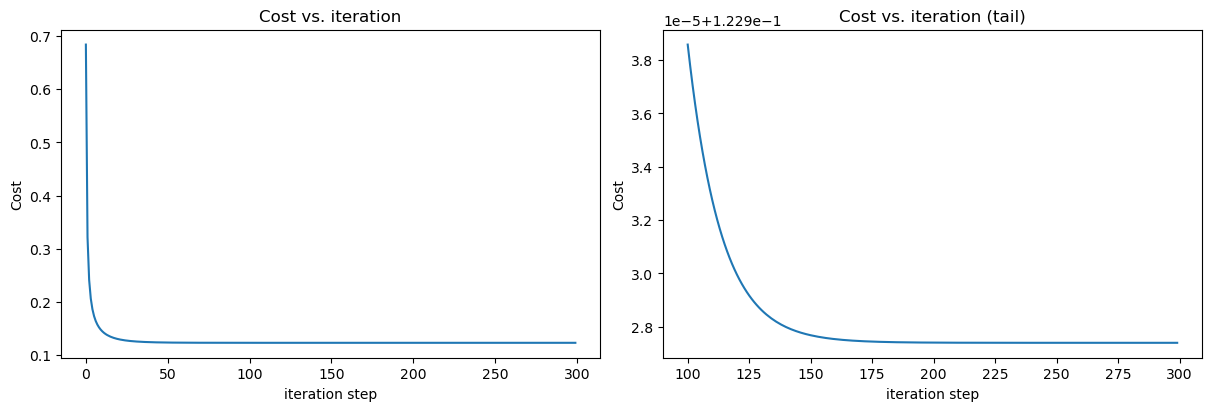

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist)
ax2.plot(100 + np.arange(len(cost_hist[100:])), cost_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [20]:
# 5. Print results
print("\nAfter gradient descent:")
print(f"w: {w_final.flatten()}")
print(f"b: {b_final:.2f}")
print(f"Final cost: {compute_cost_logistics_lam(X_train, y_train, w_final, b_final, lambda_):.4f}")


After gradient descent:
w: [ 5.19134084 -1.86887321 -0.75078211  0.67971073  0.84547697 -0.19972416
 -0.05927024  0.46005554  0.47336122 -0.21316317]
b: -0.71
Final cost: 0.1229


In [21]:
#Compare with skleearn.
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model from Scikit-learn
model = LogisticRegression(random_state=42, max_iter=30000, solver='lbfgs')
model.fit(X_train, y_train)

# Extract weights (coefficients) and bias (intercept) from the trained model
print("Scikit-learn w (weights):", model.coef_)
print("Scikit-learn b (bias):", model.intercept_)

Scikit-learn w (weights): [[ 5.1919354  -1.86881818 -0.75080979  0.67905952  0.84460372 -0.19978464
  -0.05866558  0.46013063  0.47409626 -0.21221012]]
Scikit-learn b (bias): [-0.70887414]


In [22]:
# This code is crucial for checking If the model is predicting reasonable probabilities
# If the z values are within a good range for learning
# If the logistic regression model is learning effectively over iterations
for i in range(num_iters):
    z = np.dot(X_train, w_final) + b_final
print(f"Min sigmoid output: {np.min(sigmoid(z))}, Max sigmoid output: {np.max(sigmoid(z))}")
print(f"Iteration {i}: Min z = {np.min(z)}, Max z = {np.max(z)}")

Min sigmoid output: 3.023852336511365e-06, Max sigmoid output: 0.9999999999997844
Iteration 29999: Min z = -12.708975907501056, Max z = 29.16568672624453


In [23]:
manual_preds = sigmoid(np.dot(X_train, w_final) + b_final) >= 0.5

# model accuracy
print(f"Manual Model Accuracy: {np.mean(manual_preds == y_train) * 100:.2f}%")


Manual Model Accuracy: 98.02%


In [24]:
# Normalise X_test
def zscore_normalise_features(X_test):
    """
    Computes X_test and uses the zscore technique to normalise the features.

    Args:
        X_test (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        sigma (ndarray(n,))     : Standard deviation of each feature
    """
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_test_norm1 = (X_test - X_mu) / X_sigma     # zscore normaliseing technique formula.

    return (X_test_norm1)

In [25]:
X_test_norm = zscore_normalise_features(X_test)

In [26]:
X_test = X_test_norm

In [27]:
# Making predictions.
def predict(X_test, w_final, b_final):
    z = np.dot(X_test, w_final) + b_final  # Compute linear function
    probability = sigmoid(z)  # Apply sigmoid activation
    return [1 if p >= 0.5 else 0 for p in probability]  # Convert probability to class (0 or 1)

# Predict labels for test data
y_pred = predict(X_test, w_final, b_final)

# Display first 10 predictions
print("1 = malignant", "0 = benign", "\n")
for i in range(10):  
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}",)

1 = malignant 0 = benign 

Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


Accuracy: 0.9825

Confusion Matrix:
[[70  1]
 [ 1 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



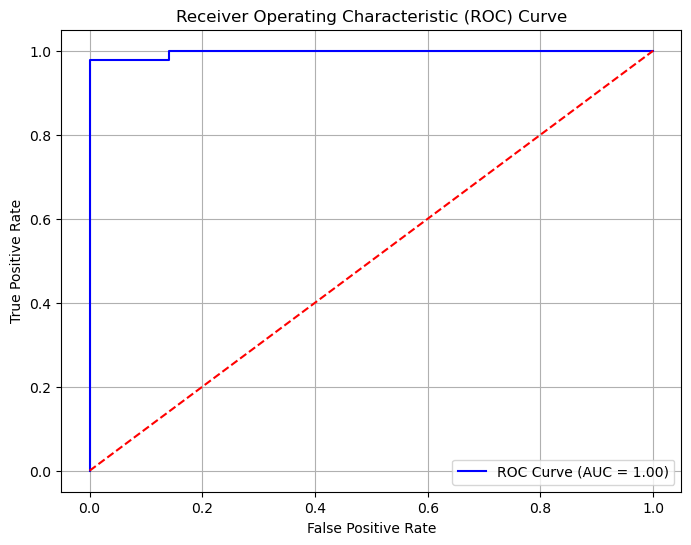

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Generate predictions
y_pred = model.predict(X_test)  # Predict class labels
y_prob = model.predict_proba(X_test)  # Predict probabilities for each class

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC Curve and AUC Score (for binary classification)
y_prob_positive = y_prob[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)  # Calculate ROC curve
auc = roc_auc_score(y_test, y_prob_positive)  # Calculate AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()
# Why Is the Classification Report Important?
# Precision and recall for each class show how well the model handles class imbalances
# F1-score balances false positives and false negatives, which is crucial in sensitive applications like medical diagnosis.
# Instead of just accuracy, it provides a deeper understanding of model performance for each class.

In [29]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

Cross-Validation Accuracy Scores: [0.97802198 0.96703297 0.97802198 0.96703297 0.96703297]
Mean CV Accuracy: 0.9714
Standard Deviation of CV Accuracy: 0.0054
